In [60]:
#seth hensley
#80105592
#homework 3.b

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

alpha = .001
iterations = 8000
theta = np.zeros(12)
penalty = .001

theta = theta.reshape(12,1)

df = pd.read_csv("C:\\Users\\shens\\Desktop\\Housing.csv")

df.guestroom.replace(('yes', 'no'), (1, 0), inplace=True)
df.mainroad.replace(('yes', 'no'), (1, 0), inplace=True)
df.basement.replace(('yes', 'no'), (1, 0), inplace=True)
df.hotwaterheating.replace(('yes', 'no'), (1, 0), inplace=True)
df.airconditioning.replace(('yes', 'no'), (1, 0), inplace=True)
df.prefarea.replace(('yes', 'no'), (1, 0), inplace=True)
df.furnishingstatus.replace(('furnished', 'semi-furnished','unfurnished'), (1, 0.5,0), inplace=True)

dfnorm = df.copy()
dfstand = df.copy()


#standardization
for column in dfstand.columns:
    dfstand[column] =  dfstand[column]/ dfstand[column].abs().max()

#normalization
for column in dfstand.columns:
    dfnorm[column] = (dfnorm[column] - dfnorm[column].min()) / (dfnorm[column].max() - dfnorm[column].min()) 

    
x1s= dfstand.values[:,1]
x2s= dfstand.values[:,2]
x3s= dfstand.values[:,3]
x4s= dfstand.values[:,4]
x5s= dfstand.values[:,5]
x6s= dfstand.values[:,6]
x7s= dfstand.values[:,7]
x8s= dfstand.values[:,8]
x9s= dfstand.values[:,9]
x10s= dfstand.values[:,10]
x11s= dfstand.values[:,11]
Ys = dfstand.values[:,0]


x1n= dfnorm.values[:,1]
x2n= dfnorm.values[:,2]
x3n= dfnorm.values[:,3]
x4n= dfnorm.values[:,4]
x5n= dfnorm.values[:,5]
x6n= dfnorm.values[:,6]
x7n= dfnorm.values[:,7]
x8n= dfnorm.values[:,8]
x9n= dfnorm.values[:,9]
x10n= dfnorm.values[:,10]
x11n= dfnorm.values[:,11]
Yn = dfnorm.values[:,0]

m = len(Yn)

x0 = np.ones((m,1))
x1s =x1s.reshape(m,1)
x2s =x2s.reshape(m,1)
x3s =x3s.reshape(m,1)
x4s =x4s.reshape(m,1)
x5s =x5s.reshape(m,1)
x6s =x6s.reshape(m,1)
x7s =x7s.reshape(m,1)
x8s =x8s.reshape(m,1)
x9s =x9s.reshape(m,1)
x10s =x10s.reshape(m,1)
x11s =x11s.reshape(m,1)
Ys = Ys.reshape(m,1)


x1n =x1n.reshape(m,1)
x2n =x2n.reshape(m,1)
x3n =x3n.reshape(m,1)
x4n =x4n.reshape(m,1)
x5n =x5n.reshape(m,1)
x6n =x6n.reshape(m,1)
x7n =x7n.reshape(m,1)
x8n =x8n.reshape(m,1)
x9n =x9n.reshape(m,1)
x10n =x10n.reshape(m,1)
x11n =x11n.reshape(m,1)
Yn = Yn.reshape(m,1)


Xs= np.hstack((x0, x1s, x2s, x3s, x4s, x5s, x6s, x7s, x8s, x9s, x10s, x11s))
Xn = np.hstack((x0, x1n, x2n, x3n, x4n, x5n, x6n, x7n, x8n, x9n, x10n,x11n))

Xs,Xn

(array([[1.        , 0.45802469, 0.66666667, ..., 1.        , 0.66666667,
         1.        ],
        [1.        , 0.55308642, 0.66666667, ..., 1.        , 1.        ,
         0.        ],
        [1.        , 0.61481481, 0.5       , ..., 0.        , 0.66666667,
         1.        ],
        ...,
        [1.        , 0.22345679, 0.33333333, ..., 0.        , 0.        ,
         0.        ],
        [1.        , 0.17962963, 0.5       , ..., 0.        , 0.        ,
         0.        ],
        [1.        , 0.23765432, 0.5       , ..., 0.        , 0.        ,
         0.        ]]),
 array([[1.        , 0.39656357, 0.6       , ..., 1.        , 0.66666667,
         1.        ],
        [1.        , 0.5024055 , 0.6       , ..., 1.        , 1.        ,
         0.        ],
        [1.        , 0.57113402, 0.4       , ..., 0.        , 0.66666667,
         1.        ],
        ...,
        [1.        , 0.13539519, 0.2       , ..., 0.        , 0.        ,
         0.        ],
        [1. 

In [61]:
from sklearn.model_selection import train_test_split

xsTrain,xsTest,ysTrain,ysTest = train_test_split(Xs,Ys,test_size = .2, random_state = 50)

xnTrain,xnTest,ynTrain,ynTest = train_test_split(Xn,Yn,test_size = .2, random_state = 50)

mtrain = len(xsTrain)
xnTrain,mtrain,xsTrain

(array([[1.        , 0.01752577, 0.8       , ..., 0.        , 0.        ,
         0.        ],
        [1.        , 0.45360825, 0.4       , ..., 0.        , 0.66666667,
         0.        ],
        [1.        , 0.18900344, 0.6       , ..., 1.        , 0.66666667,
         1.        ],
        ...,
        [1.        , 0.28865979, 0.2       , ..., 0.        , 0.66666667,
         0.        ],
        [1.        , 0.34123711, 0.6       , ..., 0.        , 0.33333333,
         0.        ],
        [1.        , 0.1257732 , 0.4       , ..., 0.        , 0.33333333,
         0.        ]]),
 436,
 array([[1.        , 0.11759259, 0.83333333, ..., 0.        , 0.        ,
         0.        ],
        [1.        , 0.50925926, 0.5       , ..., 0.        , 0.66666667,
         0.        ],
        [1.        , 0.27160494, 0.66666667, ..., 1.        , 0.66666667,
         1.        ],
        ...,
        [1.        , 0.36111111, 0.33333333, ..., 0.        , 0.66666667,
         0.        ],
      

In [62]:
def findLossW_penalties(X, Y, theta):
    predictions = X.dot(theta) 
    errors = np.subtract(predictions, Y) 
    sqrErrors = np.square(errors) 
    J = 1 / (2 * m) * np.sum(sqrErrors) + penalty*np.sum(np.square(theta))
    return J

In [63]:
def gradientDescentLOSS(X, Y, theta, alpha, iterations, m, xTest, yTest):
    
    cost_history = np.zeros(iterations)
    cost_historyTest = np.zeros(iterations)
    for i in range(iterations): 
        predictions = X.dot(theta) 
        errors = np.subtract(predictions, Y) 
        sum_delta = (alpha / m) * X.transpose().dot(errors); 
        theta = theta - sum_delta;
        cost_history[i] = findLossW_penalties(X, Y, theta)
        cost_historyTest[i] = findLossW_penalties(xTest,yTest,theta)
    return theta, cost_history, cost_historyTest

(array([[0.09781149],
        [0.07803226],
        [0.07418665],
        [0.08188818],
        [0.09460179],
        [0.06874671],
        [0.03325833],
        [0.02816158],
        [0.03115258],
        [0.08424986],
        [0.07336391],
        [0.05301532]]),
 array([0.07360533, 0.07311775, 0.07263366, ..., 0.00427539, 0.00427533,
        0.00427526]),
 array([0.01437395, 0.0142761 , 0.01417895, ..., 0.00078163, 0.00078162,
        0.0007816 ]))

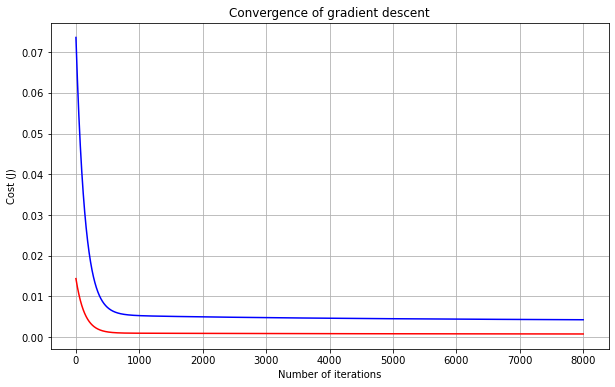

In [64]:
thetaS, lossTrainS, lossTestS = gradientDescentLOSS(Xs,Ys,theta,alpha,iterations, mtrain,xsTest,ysTest)

#thetaS, lossTrainS,lossTestS
plt.plot(range(1, iterations + 1),lossTrainS, color='blue') 
plt.plot(range(1, iterations + 1),lossTestS, color='red') 

plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Cost (J)') 
plt.title('Convergence of gradient descent') 

thetaS, lossTrainS, lossTestS

(array([[0.05175028],
        [0.08022914],
        [0.06011308],
        [0.08624221],
        [0.09602903],
        [0.06109877],
        [0.03910598],
        [0.03064761],
        [0.03358715],
        [0.09498283],
        [0.08274247],
        [0.06280754]]),
 array([0.00907533, 0.00902656, 0.0089781 , ..., 0.0009738 , 0.00097378,
        0.00097375]),
 array([0.00907533, 0.00902656, 0.0089781 , ..., 0.0009738 , 0.00097378,
        0.00097375]))

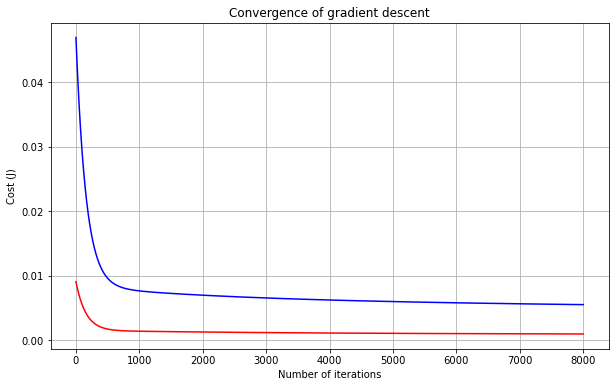

In [65]:
thetaN, lossTrainN, lossTestN = gradientDescentLOSS(Xn,Yn,theta,alpha,iterations, mtrain,xnTest,ynTest)


plt.plot(range(1, iterations + 1),lossTrainN, color='blue') 
plt.plot(range(1, iterations + 1),lossTestN, color='red') 

plt.rcParams["figure.figsize"] = (10,6) 
plt.grid() 
plt.xlabel('Number of iterations') 
plt.ylabel('Cost (J)') 
plt.title('Convergence of gradient descent') 

thetaN, lossTestN, lossTestN
